## Heart Attack Risk Prediction using Machine Learning

Here we analyse the popular Framingham Dataset with various attributes, using this dataset we predict the risk of Heart Attack of a person.

We will do use various Algorithms to predict the result and see which one suits best like Logistic Regression, Decision tree, Random Forest, KNN and SVM.

We will do following:
    <ul>
    <li>Data Analysis</li>
    <li>Feature Engineering</li>
    <li>Standardization</li>
    <li>Model Building</li>
    <li>Prediction</li>
    </ul>

Importing all neccessory libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
data = pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.shape

(4240, 16)

## Data Analysis

Remove unneccessory attributes

In [5]:
data = data.drop(['education'], axis=1)

In [6]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Checking missing data and its percentange

In [7]:
missingData = data.isnull().sum()
missingData

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
missingDataPer = (missingData.sum()/data.shape[0])*100
print(f"Missing Data Percentage is {round(missingDataPer,2)} %")

Missing Data Percentage is 12.74 %


In [9]:
total = missingData.sort_values(ascending=False)
percent_total = (missingData/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


Graphical representation of percentage of missing data by feature

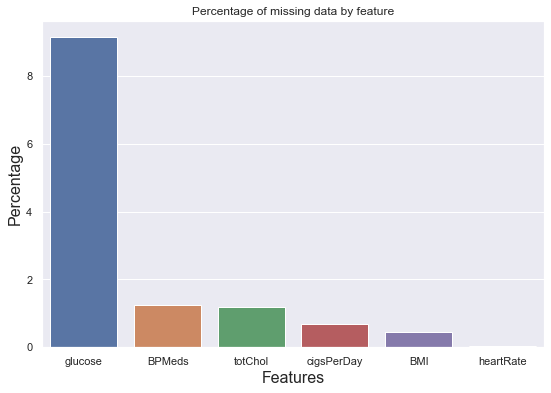

In [10]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
plt.title('Percentage of missing data by feature')
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.show()

Blood Gulcose entry has highest missing data atleast 9% and rest are small.

Delete All missing attributes or data

In [11]:
data.dropna(axis=0, inplace=True)
data.shape

(3751, 15)

Data Correlation 

In [12]:
data.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024142,0.203215,0.325886,-0.052355,-0.002513,0.003588,0.011834,-0.067595,-0.044515,0.053890,0.074868,-0.115444,0.003130,0.096000
age,-0.024142,1.000000,-0.211338,-0.188804,0.131690,0.050018,0.305292,0.109321,0.261443,0.388280,0.205191,0.136428,-0.005893,0.118529,0.231584
currentSmoker,0.203215,-0.211338,1.000000,0.773259,-0.051816,-0.037573,-0.105258,-0.045308,-0.049945,-0.133154,-0.114118,-0.165404,0.054924,-0.054078,0.021709
cigsPerDay,0.325886,-0.188804,0.773259,1.000000,-0.046625,-0.035713,-0.067470,-0.039436,-0.030600,-0.092310,-0.056202,-0.090525,0.067194,-0.055090,0.055920
BPMeds,-0.052355,0.131690,-0.051816,-0.046625,1.000000,0.111601,0.262955,0.056337,0.089625,0.269479,0.199282,0.105128,0.010228,0.052464,0.084740
prevalentStroke,-0.002513,0.050018,-0.037573,-0.035713,0.111601,1.000000,0.065169,0.009423,0.012297,0.060421,0.055189,0.035568,-0.016673,0.015789,0.047684
prevalentHyp,0.003588,0.305292,-0.105258,-0.067470,0.262955,0.065169,1.000000,0.082030,0.164645,0.697849,0.616753,0.303411,0.142013,0.085776,0.178615
diabetes,0.011834,0.109321,-0.045308,-0.039436,0.056337,0.009423,0.082030,1.000000,0.047453,0.104393,0.051761,0.093098,0.063370,0.616087,0.093222
totChol,-0.067595,0.261443,-0.049945,-0.030600,0.089625,0.012297,0.164645,0.047453,1.000000,0.216375,0.169811,0.119651,0.094795,0.046902,0.089613
sysBP,-0.044515,0.388280,-0.133154,-0.092310,0.269479,0.060421,0.697849,0.104393,0.216375,1.000000,0.785853,0.330484,0.181381,0.132878,0.220108


Heatmap representation of data correlation

<AxesSubplot:>

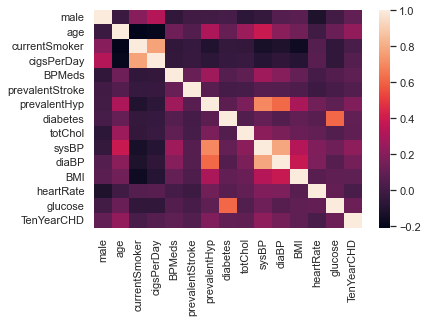

In [47]:
sns.heatmap(data.corr())

As we can see our variables are not highly correlated to each other

We will do Uni and Bi variate analysis on our Features

<AxesSubplot:title={'center':'Age of Patients'}, xlabel='age', ylabel='count'>

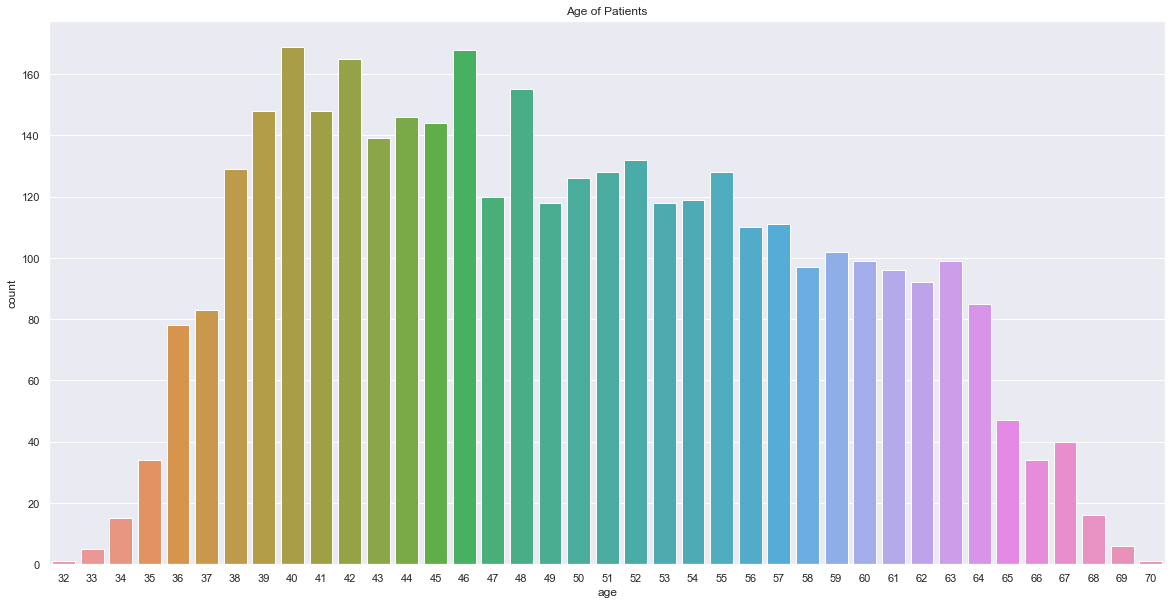

In [13]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=data)

As we can see there are most of the people of age between 36 to 64.

## Data Distribution

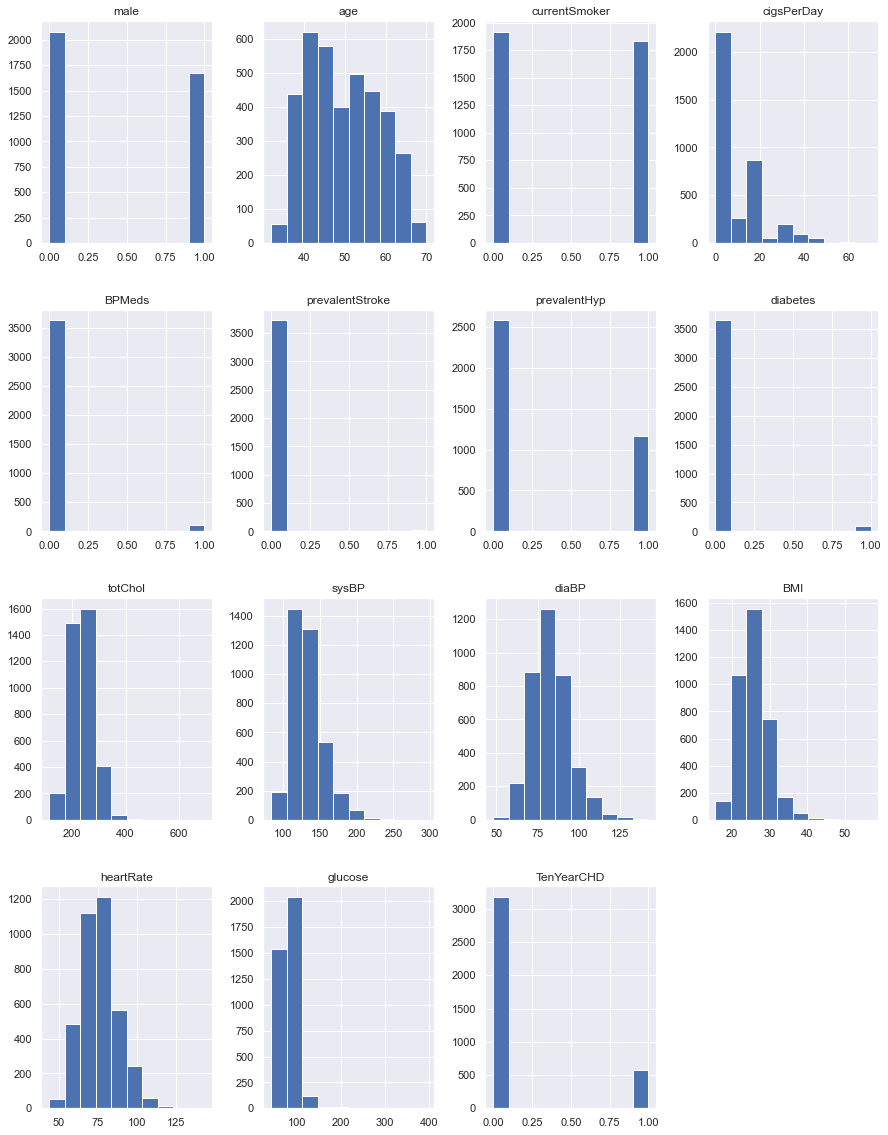

In [14]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

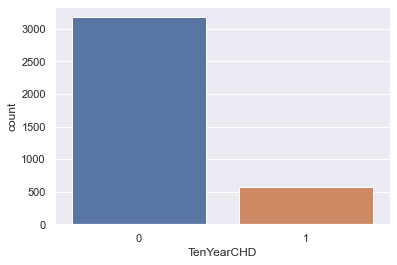

There are 3179 patients without heart disease and 572 patients with the disease


In [15]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

Number of people who have disease vs age

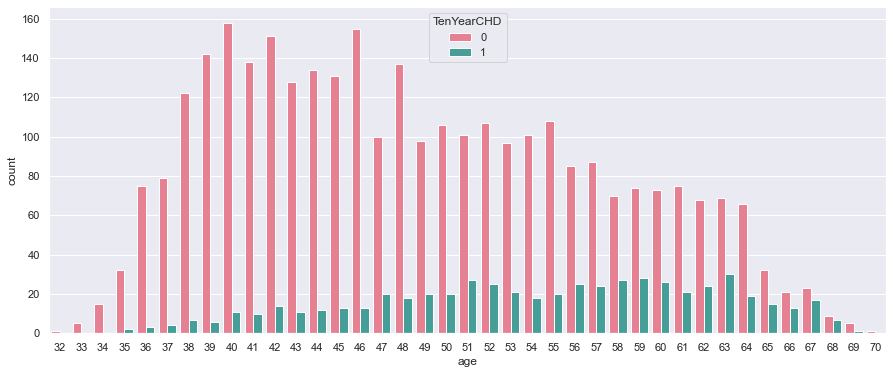

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'age', data=data, hue='TenYearCHD', palette='husl')
plt.show()

In [17]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Checking Male Patient vs Female Patient

<AxesSubplot:title={'center':'Sex of Patients,0=Female and 1=Male'}, xlabel='male', ylabel='count'>

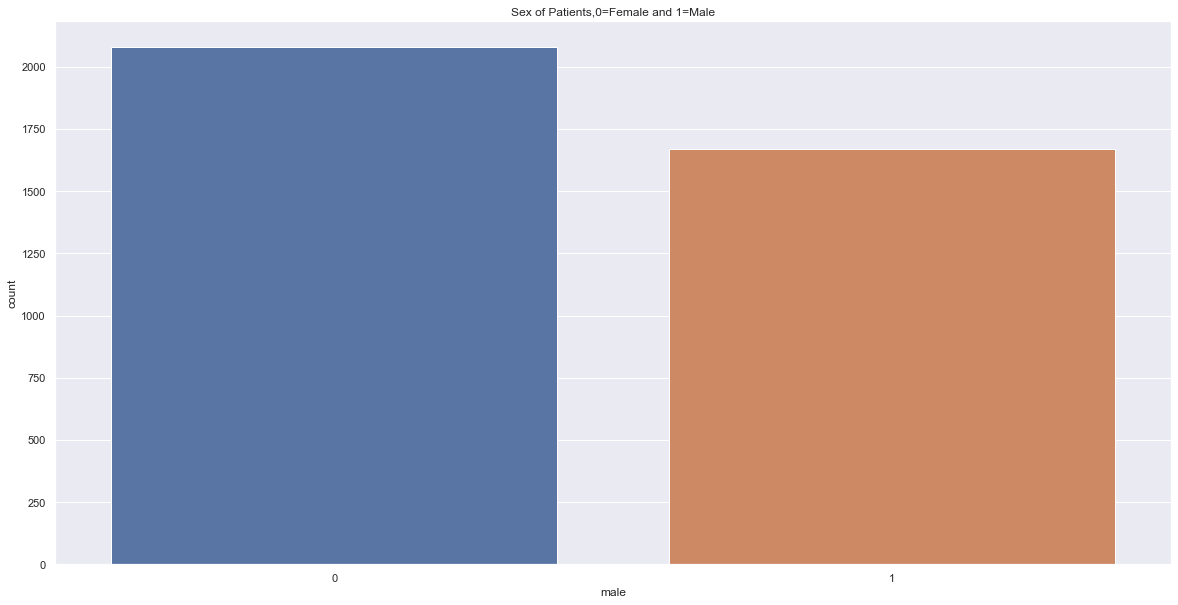

In [18]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='male',data=data)

## Feature Selection

Here we will use the Boruta algorithm which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

<h4>Methodology:</h4>
Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).

Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.

At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.

Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1D8799CC940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1D8799CC940, verbose=2)

In [20]:
data.shape

(3751, 15)

In [21]:
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

We see that age and the systolic blood pressures are selected as the most important features for predicting the Ten year risk of developing CHD.

However we will use thee six most important features to build our models

In [22]:
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

<h5>The top features are:</h5>
    <ol>
    <li>Age</li>
    <li>Total cholesterol</li>
    <li>Systolic blood pressure</li>
    <li>Diastolic blood pressure</li>
    <li>BMI</li>
    <li> Heart rate</li>
    <li>Blood glucose</li>
    </ol>


### Statistics on the top features

In [23]:
import statsmodels.api as sm

In [24]:
X_top = data[top_features]
y = data['TenYearCHD']

In [25]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                 0.02354
Time:                        15:03:45   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

In [26]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.011381  1.033813    1.022536
totChol    0.994963  0.999184    0.997071
sysBP      1.018236  1.031493    1.024843
diaBP      0.962258  0.984627    0.973378
BMI        0.929304  0.973798    0.951291
heartRate  0.963690  0.977730    0.970685
glucose    1.001074  1.007518    1.004291


Holding all other features constant, the odds of getting diagnosed with heart disease increases with about 2% for every increase in age an systolic blood pressure

The other factors show no significant change

Pair plots:

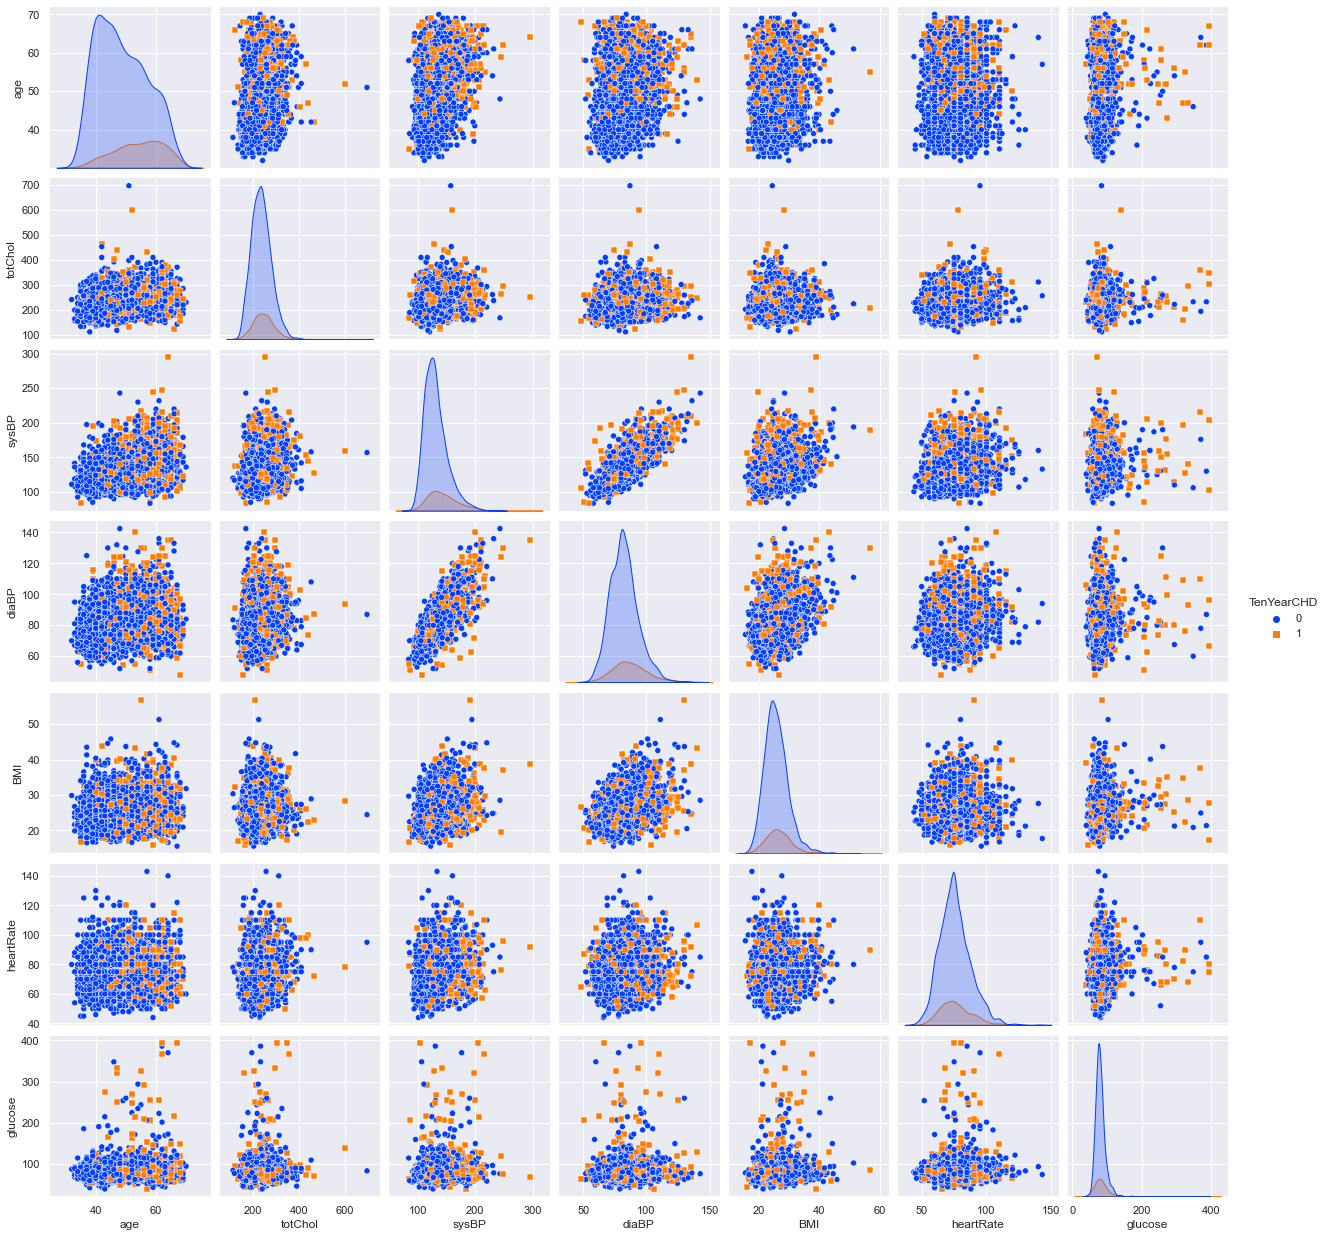

In [27]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features, palette = sns.color_palette("bright", 2))

Let us see our continous variables

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

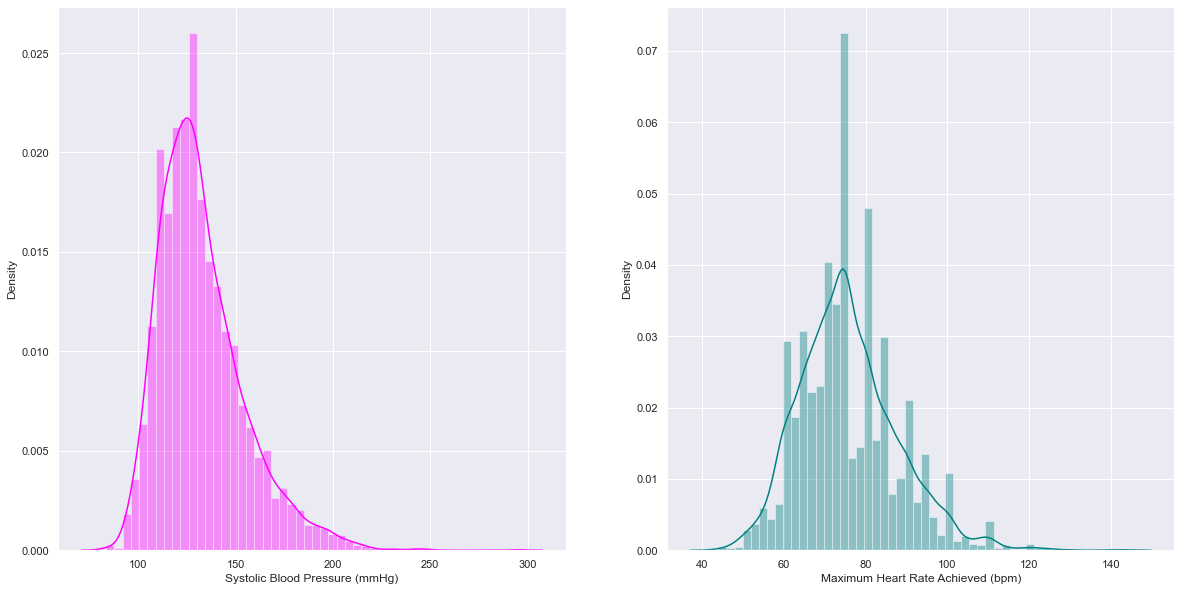

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(data['sysBP'], kde=True, color = 'magenta')
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(data['heartRate'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

Text(0.5, 0, 'Cholestrol')

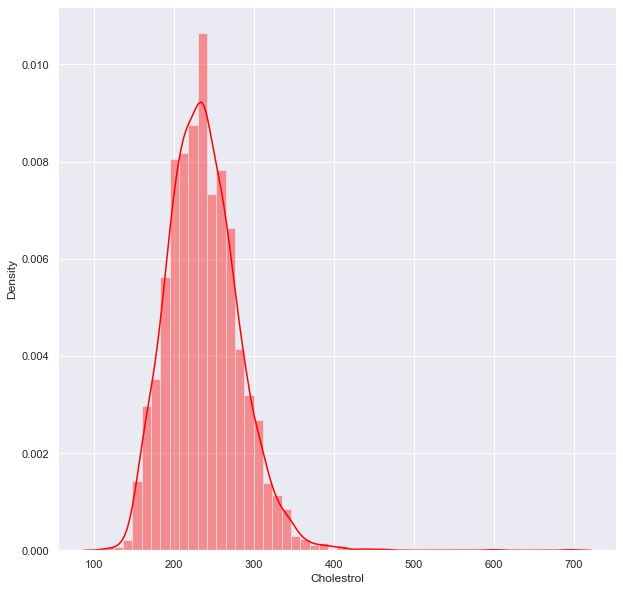

In [29]:
plt.figure(figsize=(10,10))
sns.distplot(data['totChol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

In [30]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [31]:
data.shape

(3751, 15)

### Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scale = StandardScaler()

In [34]:
scale.fit(data)

StandardScaler()

In [35]:
data = scale.transform(data)

In [36]:
data = pd.DataFrame(data, columns=['male', 'age',	'currentSmoker',	'cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose',	'TenYearCHD'])

In [37]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.116292,-1.233910,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365,-0.424183
1,-0.895823,-0.417017,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242,-0.424183
2,1.116292,-0.183620,1.023469,0.921832,-0.177044,-0.075034,-0.673285,-0.167191,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509,-0.424183
3,-0.895823,1.333466,1.023469,1.760511,-0.177044,-0.075034,1.485255,-0.167191,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456,2.357476
4,-0.895823,-0.417017,1.023469,1.173436,-0.177044,-0.075034,-0.673285,-0.167191,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657,-0.424183


## Model and Prediction

<h4>We will use the following models for our predictions :</h4>
    <ul>
    <li>Logistic Regression</li>
    <li>Decision Tree</li>
    <li>K-Nearest Neighbour</li>
    <li>Support Vector Machine</li>
    <li>Random Forest</li>
    </ul>
Let us split our data

In [38]:
x= data.iloc[:,:-1]
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.116292,-1.233910,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365
1,-0.895823,-0.417017,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242
2,1.116292,-0.183620,1.023469,0.921832,-0.177044,-0.075034,-0.673285,-0.167191,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509
3,-0.895823,1.333466,1.023469,1.760511,-0.177044,-0.075034,1.485255,-0.167191,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456
4,-0.895823,-0.417017,1.023469,1.173436,-0.177044,-0.075034,-0.673285,-0.167191,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1.116292,0.049778,1.023469,-0.671659,-0.177044,-0.075034,1.485255,-0.167191,1.705434,2.115426,0.759476,0.039781,-0.811732,0.172535
3747,1.116292,0.166477,1.023469,2.850795,-0.177044,-0.075034,-0.673285,-0.167191,-0.670947,-0.266220,-0.246291,-1.500173,-0.895380,-0.581264
3748,-0.895823,0.283176,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,0.719012,0.051333,0.005150,-1.067215,0.359347,1.051967
3749,1.116292,-1.117211,-0.977069,-0.755527,-0.177044,-0.075034,1.485255,-0.167191,-1.164158,0.391568,1.262360,-0.051239,-0.728083,-0.413753


In [39]:
y= data.iloc[:,-1:]
y

,TenYearCHD
0,-0.424183
1,-0.424183
2,-0.424183
3,2.357476
4,-0.424183
...,...
3746,2.357476
3747,-0.424183
3748,-0.424183
3749,-0.424183


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [42]:
lbl = LabelEncoder()

In [43]:
encoded_y = lbl.fit_transform(y_train)

In [44]:
logreg= LogisticRegression()

In [45]:
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [56]:
Y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [54]:
encoded_ytest= lbl.fit_transform(y_test)

In [55]:
Y_pred1 = logreg.predict(x_test)

In [57]:
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [58]:
lr_conf_matrix

array([[942,  11],
       [157,  16]], dtype=int64)

<AxesSubplot:>

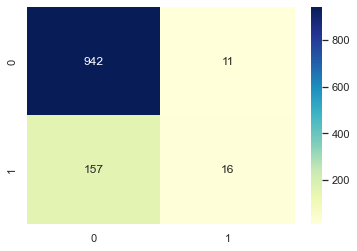

In [59]:
sns.heatmap(lr_conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [60]:
print(f"Logistic Regression accuracy is {round(lr_acc_score*100, 2)} %.")

Logistic Regression accuracy is 85.08 %.


### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree = DecisionTreeClassifier()

In [63]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [64]:
ypred2=tree.predict(x_test)

In [65]:
encoded_ytest= lbl.fit_transform(y_test)

In [66]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [67]:
tree_conf_matrix

array([[798, 155],
       [116,  57]], dtype=int64)

sns.heatmap(tree_conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [69]:
print(f"Decision Tree accuracy is {round(tree_acc_score*100, 2)} %.")

Decision Tree accuracy is 75.93 %.


### K-Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

We have to select what k we will use for the maximum accuracy

In [71]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

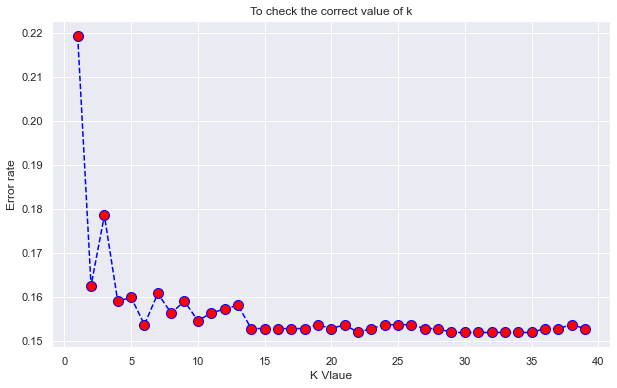

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

As we see from the graph we should select K= 12 as it gives the best error rate

In [75]:
knn= KNeighborsClassifier(n_neighbors=12)

In [76]:
knn.fit(x_train, encoded_y)

KNeighborsClassifier(n_neighbors=12)

In [77]:
ypred3 = knn.predict(x_test)

In [78]:
knn_conf_matrix = confusion_matrix(encoded_ytest, ypred3)
knn_acc_score = accuracy_score(encoded_ytest, ypred3)

In [79]:
knn_conf_matrix

array([[945,   8],
       [169,   4]], dtype=int64)

<AxesSubplot:>

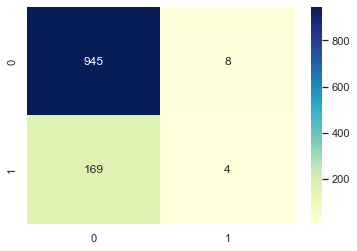

In [80]:
sns.heatmap(knn_conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [81]:
print(f"KNN accuracy is {round(knn_acc_score*100, 2)} %.")

KNN accuracy is 84.28 %.


### Support Vector Machine

In [103]:
from sklearn.svm import SVC

In [102]:
svm = SVC()

In [84]:
svm.fit(x_train, encoded_y)

SVC()

In [85]:
ypred4 = svm.predict(x_test)

In [86]:
svm_conf_matrix = confusion_matrix(encoded_ytest, ypred4)
svm_acc_score = accuracy_score(encoded_ytest, ypred4)

In [87]:
svm_conf_matrix

array([[952,   1],
       [172,   1]], dtype=int64)

<AxesSubplot:>

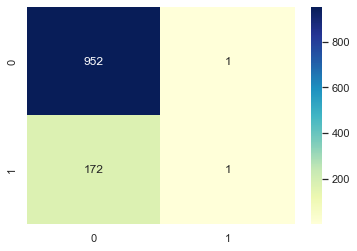

In [88]:
sns.heatmap(svm_conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [89]:
print(f"Support Vector Machine Accuracy is {round(svm_acc_score*100, 2)} %.")

Support Vector Machine Accuracy is 84.64 %.


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()

In [92]:
rf.fit(x_train, encoded_y)

RandomForestClassifier()

In [93]:
ypred5 = rf.predict(x_test)

In [94]:
rf_conf_matrix = confusion_matrix(encoded_ytest, ypred5)
rf_acc_score = accuracy_score(encoded_ytest, ypred5)

In [95]:
rf_conf_matrix

array([[941,  12],
       [158,  15]], dtype=int64)

<AxesSubplot:>

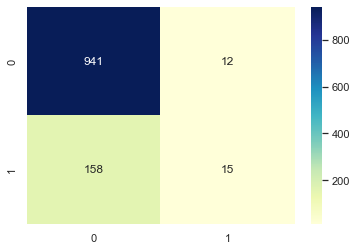

In [96]:
sns.heatmap(rf_conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [97]:
print(f"Random Forest accuracy is {round(rf_acc_score*100, 2)} %.")

Random Forest accuracy is 84.9 %.


### Comparing All Model Accuracy

In [104]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [105]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [106]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.079929
2,Random Forest,84.902309
4,SVM,84.635879
3,K Nearest Neighbor,84.280639
1,Decision Tree,75.932504


Here as we can see Logistic Regression has highest accuracy atleast and after it Random Forest and other we can see in list or Bar Plot

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

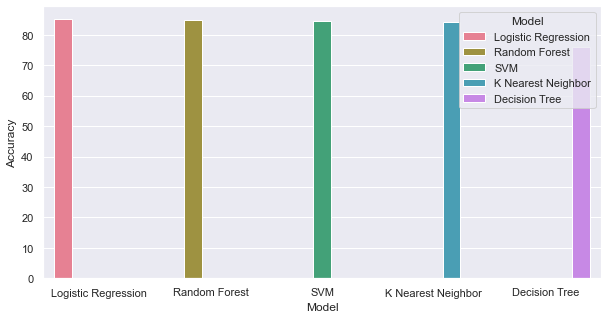

In [107]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Model', y='Accuracy', data = model_acc, hue='Model', palette='husl')

### Conclusion

1. The most important features in predicting the ten year risk of developing CHD were age and systolic blood pressure.
2. As we have seen Logistic Regression gave highest accuracy.
3. Most of the patient were of 36 to 64 age group.
